#### Adicionales

**R1. Descuento porsegmento de cliente**
    * Oro: 10%
    *
**R2.**

**R3.**

**R4.**

**R5.**

*Descripción de su propuesta para aplicar operaciones de integración, transformación y limpieza. Definiendo el orden y el resultado esperado de aplicar cada operación.*

# Propuesta

Para la integracion de las cuatro tablas, tendremos en cuenta lo siguiente:

* Para la anonimizacion de los clientes, sus nombres se van a omitir
* Se haran merge para juntar todas las tablas.
* Primero, se juntara la tabla de sales con *products*, para tener una vista general de los productos vendidos. Despues, se hara con *shipping*, y por ultimo, con los clientes.
* Al final, se efectuaran las operaciones con la tabla final ya consolidada.


In [9]:
import pandas as pd
import numpy as np

In [10]:
dfcust = pd.read_csv('customers.csv')
dfprods = pd.read_csv('products.csv')
dfsales = pd.read_csv('sales.csv')
dfshipp = pd.read_csv('shipping.csv')

dfcust.info()
dfprods.info()
dfsales.info()
dfshipp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer_ID    10 non-null     object
 1   Customer_Name  10 non-null     object
 2   Region         10 non-null     object
 3   Gender         10 non-null     object
 4   Age            10 non-null     int64 
 5   Segment        10 non-null     object
 6   Loyalty_Level  10 non-null     object
dtypes: int64(1), object(6)
memory usage: 692.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           10 non-null     object 
 1   Category          10 non-null     object 
 2   Base_Price        10 non-null     int64  
 3   Discount          10 non-null     float64
 4   Supplier          10 non-null     object 
 5   Popularity_Score  10 n

In [11]:
# MERGE DE SALES SHIPPINH
sales_shipp = pd.merge(dfsales, dfshipp, how='inner', on='Order_ID')
sales_shipp
# MERGE DE LO ANTERIOR CON prods
sales_prod_shipp = pd.merge(sales_shipp, dfprods, how='inner', on='Product')
sales_prod_shipp
# MERGE DE LO ANTERIOR CON CLIENTE
merge_all = pd.merge(dfcust, sales_prod_shipp, how='inner', on='Customer_ID')
merge_all.drop(columns=['Customer_Name','Region'], inplace=True)
merge_all

,Customer_ID,Gender,Age,Segment,Loyalty_Level,Order_ID,Date,Product,Amount,Shipping_Cost,Shipping_Method,Shipping_Region,Category,Base_Price,Discount,Supplier,Popularity_Score
0,Customer_1,Male,32,Gold,Platinum,Order_1,2023-01-01,Product_A,120,10,Express,North,Electronics,150,0.10,Supplier_X,8
1,Customer_1,Male,32,Gold,Platinum,Order_5,2023-01-05,Product_B,200,18,Express,North,Home & Kitchen,120,0.05,Supplier_Y,6
2,Customer_1,Male,32,Gold,Platinum,Order_9,2023-01-09,Product_B,220,11,Express,North,Home & Kitchen,120,0.05,Supplier_Y,6
3,Customer_2,Female,28,Silver,Gold,Order_2,2023-01-02,Product_B,180,15,Standard,South,Home & Kitchen,120,0.05,Supplier_Y,6
4,Customer_2,Female,28,Silver,Gold,Order_6,2023-01-06,Product_A,110,9,Standard,South,Electronics,150,0.10,Supplier_X,8
5,Customer_2,Female,28,Silver,Gold,Order_10,2023-01-10,Product_C,120,16,Standard,South,Clothing,80,0.20,Supplier_Z,9
6,Customer_3,Male,40,Platinum,Silver,Order_3,2023-01-03,Product_A,150,8,Express,West,Electronics,150,0.10,Supplier_X,8
7,Customer_3,Male,40,Platinum,Silver,Order_7,2023-01-07,Product_C,130,14,Express,West,Clothing,80,0.20,Supplier_Z,9
8,Customer_4,Female,35,Gold,Bronze,Order_4,2023-01-04,Product_C,90,12,Standard,East,Clothing,80,0.20,Supplier_Z,9
9,Customer_4,Female,35,Gold,Bronze,Order_8,2023-01-08,Product_A,160,20,Standard,East,Electronics,150,0.10,Supplier_X,8


In [12]:
# INTEGRACION DE REGLAS
# R1
merge_all['Segment_Discount'] = merge_all.apply(
    lambda row: 0.1 if row['Segment'] == 'Gold'
    else( 0.05 if row['Segment'] == 'Silver' else 0 ),
    axis = 1
)
# R2
merge_all['Loyalty_Discount'] = merge_all.apply(
    lambda row: 0.15 if row['Loyalty_Level'] == 'Platinum'
    else( 0.1 if row['Loyalty_Level'] == 'Gold' else 0 ),
    axis = 1
)
merge_all['Dinamic_Price'] = merge_all.apply(
    lambda row: 0.1 * row['Popularity_Score'] * row['Base_Price'],
    axis = 1
)
merge_all['Discounted'] = merge_all.apply(
    lambda row: row['Amount'] *
                (1 - row['Discount'] - row['Segment_Discount'] - row['Loyalty_Discount']) -
    row['Dinamic_Price'],
    axis = 1
)
merge_all

,Customer_ID,Gender,Age,Segment,Loyalty_Level,Order_ID,Date,Product,Amount,Shipping_Cost,...,Shipping_Region,Category,Base_Price,Discount,Supplier,Popularity_Score,Segment_Discount,Loyalty_Discount,Dinamic_Price,Discounted
0,Customer_1,Male,32,Gold,Platinum,Order_1,2023-01-01,Product_A,120,10,...,North,Electronics,150,0.10,Supplier_X,8,0.10,0.15,120.0,-42.0
1,Customer_1,Male,32,Gold,Platinum,Order_5,2023-01-05,Product_B,200,18,...,North,Home & Kitchen,120,0.05,Supplier_Y,6,0.10,0.15,72.0,68.0
2,Customer_1,Male,32,Gold,Platinum,Order_9,2023-01-09,Product_B,220,11,...,North,Home & Kitchen,120,0.05,Supplier_Y,6,0.10,0.15,72.0,82.0
3,Customer_2,Female,28,Silver,Gold,Order_2,2023-01-02,Product_B,180,15,...,South,Home & Kitchen,120,0.05,Supplier_Y,6,0.05,0.10,72.0,72.0
4,Customer_2,Female,28,Silver,Gold,Order_6,2023-01-06,Product_A,110,9,...,South,Electronics,150,0.10,Supplier_X,8,0.05,0.10,120.0,-37.5
5,Customer_2,Female,28,Silver,Gold,Order_10,2023-01-10,Product_C,120,16,...,South,Clothing,80,0.20,Supplier_Z,9,0.05,0.10,72.0,6.0
6,Customer_3,Male,40,Platinum,Silver,Order_3,2023-01-03,Product_A,150,8,...,West,Electronics,150,0.10,Supplier_X,8,0.00,0.00,120.0,15.0
7,Customer_3,Male,40,Platinum,Silver,Order_7,2023-01-07,Product_C,130,14,...,West,Clothing,80,0.20,Supplier_Z,9,0.00,0.00,72.0,32.0
8,Customer_4,Female,35,Gold,Bronze,Order_4,2023-01-04,Product_C,90,12,...,East,Clothing,80,0.20,Supplier_Z,9,0.10,0.00,72.0,-9.0
9,Customer_4,Female,35,Gold,Bronze,Order_8,2023-01-08,Product_A,160,20,...,East,Electronics,150,0.10,Supplier_X,8,0.10,0.00,120.0,8.0


In [13]:
merge_all.to_csv('merged.csv', index=False)

# Analisis

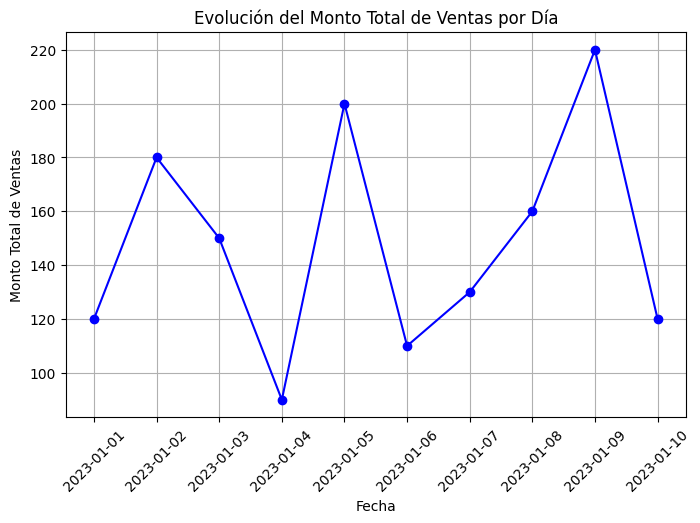

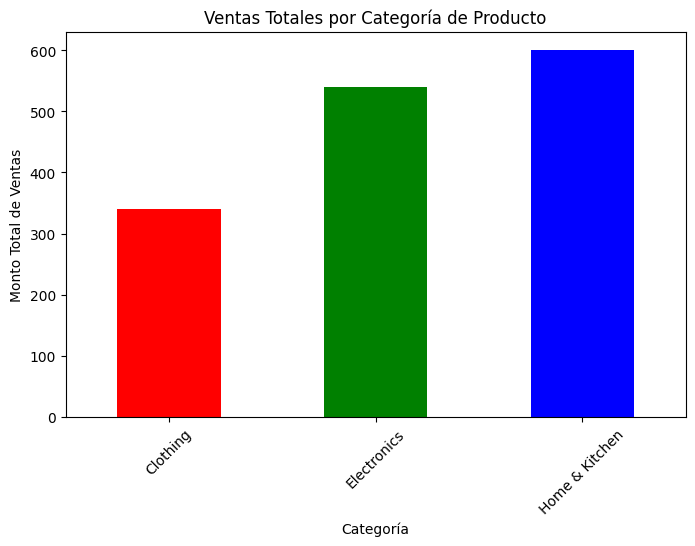

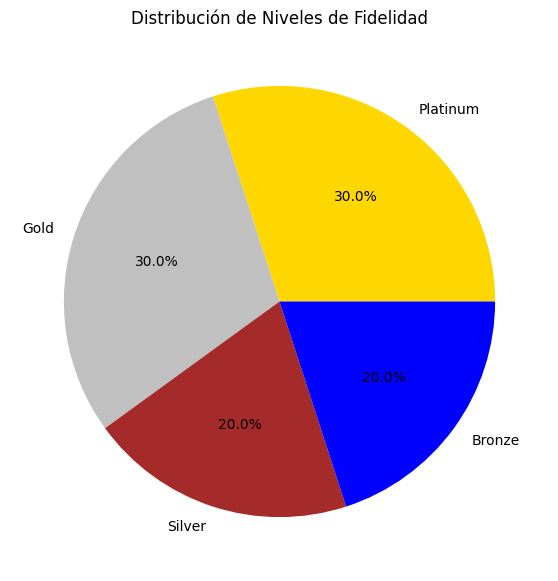

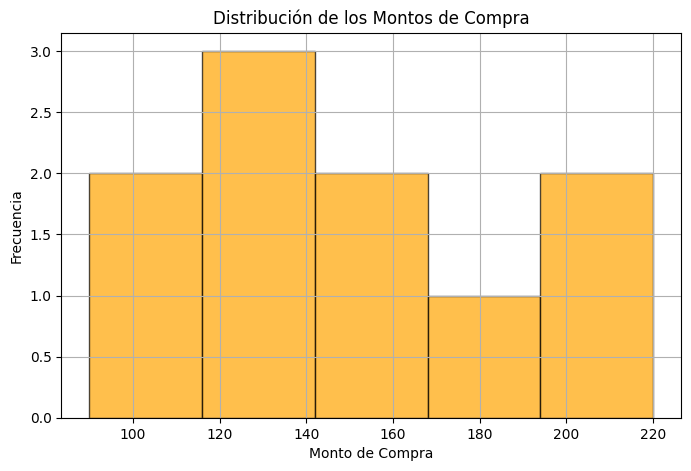

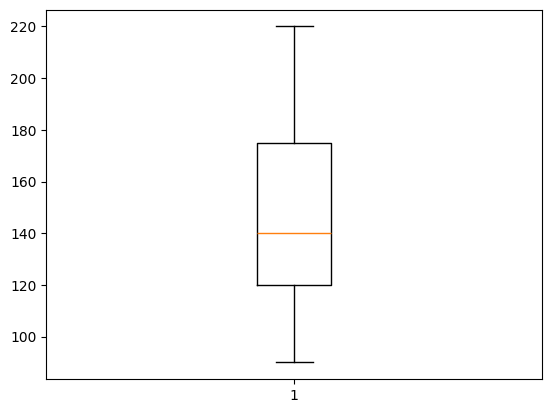

In [17]:
import matplotlib.pyplot as plt

# 1. Gráfico de líneas: Evolución del monto total de ventas por día
df_daily_sales = merge_all.groupby("Date")["Amount"].sum()

plt.figure(figsize=(8, 5))
plt.plot(df_daily_sales.index, df_daily_sales.values, marker="o", linestyle="-", color="b")
plt.xlabel("Fecha")
plt.ylabel("Monto Total de Ventas")
plt.title("Evolución del Monto Total de Ventas por Día")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 2. Gráfico de barras: Total de ventas por categoría de producto
df_category_sales = merge_all.groupby("Category")["Amount"].sum()

plt.figure(figsize=(8, 5))
df_category_sales.plot(kind="bar", color=["red", "green", "blue"])
plt.xlabel("Categoría")
plt.ylabel("Monto Total de Ventas")
plt.title("Ventas Totales por Categoría de Producto")
plt.xticks(rotation=45)
plt.show()

# 3. Gráfico de pastel: Distribución de los niveles de fidelidad de los clientes
df_loyalty_distribution = merge_all["Loyalty_Level"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(df_loyalty_distribution, labels=df_loyalty_distribution.index, autopct="%1.1f%%", colors=["gold", "silver", "brown", "blue"])
plt.title("Distribución de Niveles de Fidelidad")
plt.show()


# 4. Histograma: Distribución de los montos de compra
plt.figure(figsize=(8, 5))
plt.hist(merge_all["Amount"], bins=5, color="orange", edgecolor="black", alpha=0.7)
plt.xlabel("Monto de Compra")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Montos de Compra")
plt.grid()
plt.show()

# 5. Boxplot: Media de gasto por orden
plt.boxplot(merge_all["Amount"])
plt.show()
